In [111]:
# Required libraries
import os
import pandas as pd
import IPython as IP
import struct
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import tqdms
import librosa
from librosa import display
from tabulate import tabulate

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPool1D, GlobalMaxPooling1D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import keras
import tensorflow as tf

In [2]:
# data folder
DATA_FOLDER = 'Fan-Dataset-A16.44'

In [5]:

Files = []
import os
for dirname, _, filenames in os.walk(DATA_FOLDER):
    for filename in filenames:
        i = os.path.join(dirname, filename)
        Files.append(i)

In [6]:
# length of the files
len(Files)

261

In [7]:
# top 10 audio files
Files[:10]

['Fan-Dataset-A16.44\\Normal Fan Noise\\listen_1619681854230.wav',
 'Fan-Dataset-A16.44\\Normal Fan Noise\\listen_1619681872070.wav',
 'Fan-Dataset-A16.44\\Normal Fan Noise\\listen_1619681887462.wav',
 'Fan-Dataset-A16.44\\Normal Fan Noise\\listen_1619681906003.wav',
 'Fan-Dataset-A16.44\\Normal Fan Noise\\listen_1619681926435.wav',
 'Fan-Dataset-A16.44\\Normal Fan Noise\\listen_1619682745970.wav',
 'Fan-Dataset-A16.44\\Normal Fan Noise\\listen_1619682805767.wav',
 'Fan-Dataset-A16.44\\Normal Fan Noise\\listen_1619682826036.wav',
 'Fan-Dataset-A16.44\\Normal Fan Noise\\listen_1619685059445.wav',
 'Fan-Dataset-A16.44\\Normal Fan Noise\\listen_1619685077402.wav']

In [8]:
# Extracting the class labels
labels=[]

for i in Files:
    labels.append(i.split('\\')[-2])

In [10]:
# Top 10 class labels
labels[:10]

['Normal Fan Noise',
 'Normal Fan Noise',
 'Normal Fan Noise',
 'Normal Fan Noise',
 'Normal Fan Noise',
 'Normal Fan Noise',
 'Normal Fan Noise',
 'Normal Fan Noise',
 'Normal Fan Noise',
 'Normal Fan Noise']

In [12]:
# len of the class labels 
len(labels)

261

In [16]:
# Shuffle two lists with same order 
# Using zip() + * operator + shuffle() 
temp = list(zip(Files, labels)) 
random.shuffle(temp) 
Files, labels = zip(*temp)

In [17]:
# Creating dataframe
data = pd.DataFrame(list(zip(Files, labels)), columns =['Files_path', 'labels'])
data.shape


(261, 2)

In [18]:
# print the head
data.head()

,Files_path,labels
0,Fan-Dataset-A16.44\Plastic Film Obstruction No...,Plastic Film Obstruction Noise
1,Fan-Dataset-A16.44\Weighted blades Noise\liste...,Weighted blades Noise
2,Fan-Dataset-A16.44\Weighted blades Noise\liste...,Weighted blades Noise
3,Fan-Dataset-A16.44\Plastic Film Obstruction No...,Plastic Film Obstruction Noise
4,Fan-Dataset-A16.44\Normal Fan Noise\listen_161...,Normal Fan Noise


In [19]:
# value counts 
data.labels.value_counts()

Normal Fan Noise                  111
Weighted blades Noise              75
Plastic Film Obstruction Noise     75
Name: labels, dtype: int64

C:\Users\BALARAMI REDDY\anaconda5\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


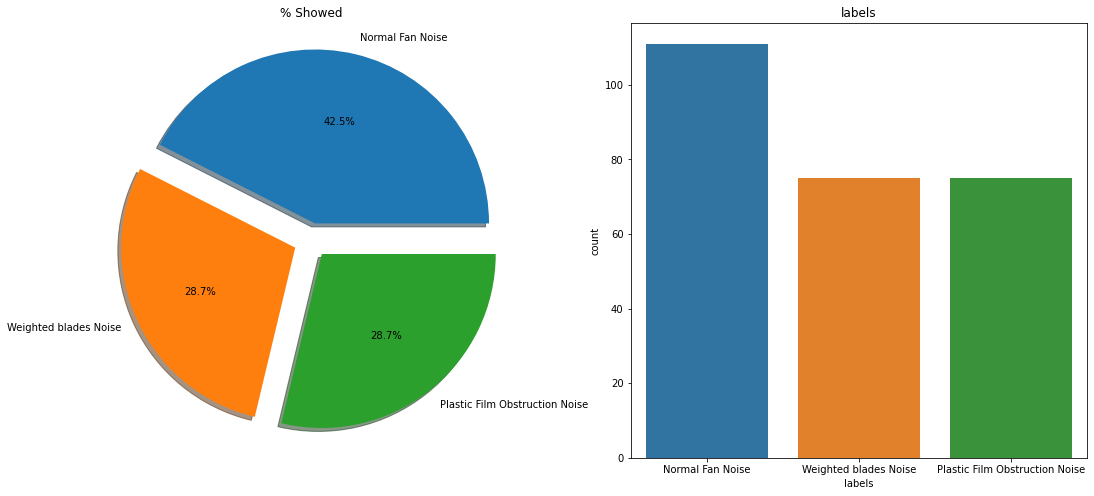

In [22]:
# Pie Chart  data.labels
f,ax=plt.subplots(1,2,figsize=(18,8))
data["labels"].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('% Showed')
ax[0].set_ylabel('')
sns.countplot('labels', order = data["labels"].value_counts().index, data=data,ax=ax[1])
ax[1].set_title('labels')
plt.show()

In [34]:
# extracting the features from audio file
mfc=[]
chrc=[]
me=[]
ton=[]
lab=[]
for i in range(len(data['Files_path'])):
    f_name= data['Files_path'][i]
    #print(i)
    X, s_rate = librosa.load(f_name, res_type='kaiser_fast')
    mf = np.mean(librosa.feature.mfcc(y=X, sr=s_rate).T,axis=0)
    mfc.append(mf)
    l=data.labels[i]
    lab.append(l)
    try:
        t =    np.mean(librosa.feature.tonnetz(
                       y=librosa.effects.harmonic(X),
                       sr=s_rate).T,axis=0)
        ton.append(t)
    except:
        print(f_name)  
    m = np.mean(librosa.feature.melspectrogram(X, sr=s_rate).T,axis=0)
    me.append(m)
    s = np.abs(librosa.stft(X))
    c = np.mean(librosa.feature.chroma_stft(S=s, sr=s_rate).T,axis=0)
    chrc.append(c)

In [69]:
# saving the extracted features
mfcc = pd.DataFrame(mfc)
mfcc.to_csv('mfc.csv', index=False)
chrr = pd.DataFrame(chrc)
chrr.to_csv('chr.csv', index=False)
mee = pd.DataFrame(me)
mee.to_csv('me.csv', index=False)
tonn = pd.DataFrame(ton)
tonn.to_csv('ton.csv', index=False)
la = pd.DataFrame(lab, columns = ["Label"])
la.to_csv('labels.csv', index=False)

In [70]:
# merging the all features
final_data = pd.concat([mfcc,chrr,mee,tonn,la], axis = 1)
final_data.shape

(261, 167)

In [71]:
# print the head
final_data.head()

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,0,1,2,3,4,5,Label
0,-117.430138,162.039810,-11.971206,81.314415,-44.263008,43.314476,-14.812026,11.134582,-5.056660,-5.662411,...,8.689215e-09,3.985195e-09,2.498529e-09,-0.102965,-0.048482,0.006702,0.104639,-0.045589,-0.028979,Plastic Film Obstruction Noise
1,-64.289948,152.213058,-88.706093,83.283279,-58.344028,41.288223,-22.437054,14.675079,-8.348190,1.151094,...,5.482163e-07,5.334128e-07,5.236585e-07,-0.030453,0.180218,-0.093653,0.119366,-0.027793,0.037995,Weighted blades Noise
2,-96.578964,141.485535,-54.999691,69.509880,-27.138063,44.669800,-5.978725,12.554000,-0.426229,-0.054261,...,4.611423e-09,2.360138e-09,1.898939e-09,0.003084,0.001682,-0.011119,0.018045,-0.001812,0.006284,Weighted blades Noise
3,-84.161583,128.171967,-36.546913,96.570953,-48.793236,59.925774,-14.126012,18.209724,-11.444077,-7.142389,...,8.102350e-09,4.613405e-09,3.616645e-09,-0.015127,0.041932,-0.047037,0.000598,-0.016712,-0.000837,Plastic Film Obstruction Noise
4,-181.174042,179.387939,-15.359706,64.471687,-13.743283,32.128334,17.141325,2.041161,0.922491,-2.305301,...,1.106271e-06,1.071435e-06,1.055351e-06,0.008042,0.041630,-0.003674,0.034461,0.002397,0.012146,Normal Fan Noise


In [77]:
# droping the target values from input data
x = final_data.drop(['Label'],  axis='columns')
y = final_data['Label']

In [78]:
# print head
y[:2]

0    Plastic Film Obstruction Noise
1             Weighted blades Noise
Name: Label, dtype: object

In [79]:
# print head
x.head(5)

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,0,1,2,3,4,5
0,-117.430138,162.039810,-11.971206,81.314415,-44.263008,43.314476,-14.812026,11.134582,-5.056660,-5.662411,...,1.071277e-08,8.689215e-09,3.985195e-09,2.498529e-09,-0.102965,-0.048482,0.006702,0.104639,-0.045589,-0.028979
1,-64.289948,152.213058,-88.706093,83.283279,-58.344028,41.288223,-22.437054,14.675079,-8.348190,1.151094,...,5.703671e-07,5.482163e-07,5.334128e-07,5.236585e-07,-0.030453,0.180218,-0.093653,0.119366,-0.027793,0.037995
2,-96.578964,141.485535,-54.999691,69.509880,-27.138063,44.669800,-5.978725,12.554000,-0.426229,-0.054261,...,6.173156e-09,4.611423e-09,2.360138e-09,1.898939e-09,0.003084,0.001682,-0.011119,0.018045,-0.001812,0.006284
3,-84.161583,128.171967,-36.546913,96.570953,-48.793236,59.925774,-14.126012,18.209724,-11.444077,-7.142389,...,1.024808e-08,8.102350e-09,4.613405e-09,3.616645e-09,-0.015127,0.041932,-0.047037,0.000598,-0.016712,-0.000837
4,-181.174042,179.387939,-15.359706,64.471687,-13.743283,32.128334,17.141325,2.041161,0.922491,-2.305301,...,1.146336e-06,1.106271e-06,1.071435e-06,1.055351e-06,0.008042,0.041630,-0.003674,0.034461,0.002397,0.012146


In [127]:
## Label encoder
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
enc.fit(y)
y = enc.transform(y)
y = np.array(y)

In [128]:
enc.classes_

array([0, 1, 2])

In [83]:
y[:2]

array([[0, 1, 0],
       [0, 0, 1]], dtype=int32)

In [103]:
# print shape
y.shape

(261, 3)

In [84]:
# data splitting 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify = y,random_state=42)

In [91]:
# train data shape
X_train.shape

(182, 166)

In [86]:
# test data shape
X_test.shape

(79, 166)

In [93]:
# reshape the train data and test data
x_train = X_train.values.reshape(182,166,1)
x_test = X_test.values.reshape(79,166,1)

In [98]:
# Set the CNN model 

model = Sequential()

model.add(Conv1D(filters = 32, kernel_size = (5),padding = 'Same', activation ='relu', input_shape = (166, 1)))


model.add(Conv1D(filters = 32, kernel_size = (5),padding = 'Same', activation ='relu'))
model.add(MaxPool1D(pool_size=(2)))
model.add(Dropout(0.2))


model.add(Conv1D(filters = 64, kernel_size = (3),padding = 'Same', activation ='relu'))
model.add(Conv1D(filters = 64, kernel_size = (3),padding = 'same', activation ='relu'))
model.add(MaxPool1D(pool_size=(2), strides=(2)))
model.add(Dropout(0.3))

model.add(Conv1D(filters = 128, kernel_size = (3),padding = 'Same', activation ='relu'))
model.add(Conv1D(filters = 128, kernel_size = (3),padding = 'Same', activation ='relu'))
model.add(MaxPool1D(pool_size=(2), strides=(2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 166, 32)           192       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 166, 32)           5152      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 83, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 83, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 83, 64)            6208      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 83, 64)            12352     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 41, 64)            0

In [104]:
# Compile the model
import tensorflow_addons as tfa
opt = Adam(lr=0.001)
f1_score = tfa.metrics.F1Score(num_classes=3, threshold=0.5)
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy", f1_score])

In [105]:
# call backs
from keras.callbacks import ModelCheckpoint
filepath="audio_weights-improvement_cnn-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [107]:
# Fit the model
history = model.fit(x_train, y_train, epochs = 30, validation_data = (x_test,y_test),batch_size = 128,callbacks = callbacks_list)

Epoch 1/30
2/2 [==============================] - 1s 318ms/step - loss: 0.5996 - accuracy: 0.7308 - f1_score: 0.6297 - val_loss: 0.6159 - val_accuracy: 0.7342 - val_f1_score: 0.5201

Epoch 00001: val_accuracy did not improve from 0.73418
Epoch 2/30
2/2 [==============================] - 0s 208ms/step - loss: 0.5073 - accuracy: 0.7747 - f1_score: 0.7111 - val_loss: 0.6921 - val_accuracy: 0.7468 - val_f1_score: 0.4582

Epoch 00002: val_accuracy improved from 0.73418 to 0.74684, saving model to /content/drive/My Drive\plant_weights-improvement_cnn-02-0.75.hdf5
Epoch 3/30
2/2 [==============================] - 0s 210ms/step - loss: 0.5745 - accuracy: 0.7527 - f1_score: 0.6526 - val_loss: 0.5487 - val_accuracy: 0.7468 - val_f1_score: 0.7297

Epoch 00003: val_accuracy did not improve from 0.74684
Epoch 4/30
2/2 [==============================] - 0s 218ms/step - loss: 0.5203 - accuracy: 0.7527 - f1_score: 0.6924 - val_loss: 0.5272 - val_accuracy: 0.7595 - val_f1_score: 0.7070

Epoch 00004: va

In [115]:
#File path
file_name = 'audio_cnn.h5'

#Save the model
tf.keras.models.save_model(model,file_name)

In [116]:
# load saving model
model = tf.keras.models.load_model('audio_cnn.h5')

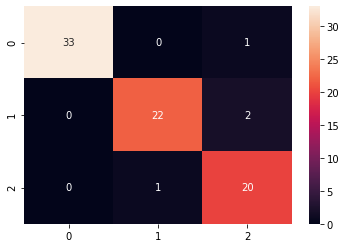

In [131]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(model.predict_classes(x_test),np.argmax(y_test,axis=1)))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

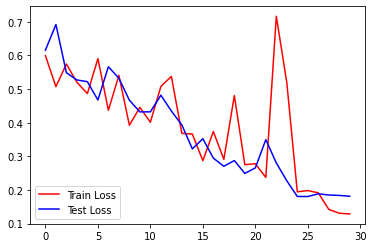

In [177]:
# plot the loss plot
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

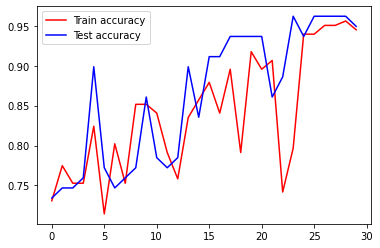

In [178]:
# plot the accuracy plot
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'Train accuracy': 'r', 'Test accuracy':'b'})
plt.show()

In [132]:
#print the test accuracy
score_1 = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score_1[1])

Test accuracy: 0.949367105960846


In [176]:
#classification_report
matrix = classification_report(model.predict_classes(x_test),np.argmax(y_test,axis=1))
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.96      0.92      0.94        24
           2       0.87      0.95      0.91        21

    accuracy                           0.95        79
   macro avg       0.94      0.95      0.94        79
weighted avg       0.95      0.95      0.95        79



C:\Users\BALARAMI REDDY\anaconda5\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [159]:
# Creating results data frame 
results = pd.DataFrame(columns=['model', 'Test-Accuracy' ])
new = ['CNN ',score_1[1]]
results.loc[0] = new

### ANN

In [145]:
# ANN model
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout


model_2 = Sequential()
model_2.add(Dense(580, activation='relu', input_shape=(166,)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(325, activation='relu' ))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(125, activation='relu' ))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(3, activation='softmax'))

model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 580)               96860     
_________________________________________________________________
batch_normalization_9 (Batch (None, 580)               2320      
_________________________________________________________________
dropout_13 (Dropout)         (None, 580)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 325)               188825    
_________________________________________________________________
batch_normalization_10 (Batc (None, 325)               1300      
_________________________________________________________________
dropout_14 (Dropout)         (None, 325)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 125)              

In [151]:
# Compile the model
import tensorflow_addons as tfa
opt = Adam(lr=0.001)
f1_score = tfa.metrics.F1Score(num_classes=3, threshold=0.5)
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model_2.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = [ f1_score, 'accuracy'])

In [152]:
# Fit the model
history_1 = model_2.fit(X_train, y_train, batch_size=32, epochs=20,  validation_data=(X_test, y_test))

Epoch 1/20
6/6 [==============================] - 4s 139ms/step - loss: 0.0071 - f1_score: 0.9986 - accuracy: 0.9975 - val_loss: 0.3525 - val_f1_score: 0.9579 - val_accuracy: 0.9620
Epoch 2/20
6/6 [==============================] - 0s 26ms/step - loss: 0.0101 - f1_score: 0.9958 - accuracy: 0.9964 - val_loss: 0.3054 - val_f1_score: 0.9579 - val_accuracy: 0.9620
Epoch 3/20
6/6 [==============================] - 0s 31ms/step - loss: 0.0754 - f1_score: 0.9698 - accuracy: 0.9739 - val_loss: 0.2647 - val_f1_score: 0.9579 - val_accuracy: 0.9620
Epoch 4/20
6/6 [==============================] - 0s 29ms/step - loss: 0.0444 - f1_score: 0.9928 - accuracy: 0.9914 - val_loss: 0.2741 - val_f1_score: 0.9579 - val_accuracy: 0.9620
Epoch 5/20
6/6 [==============================] - 0s 31ms/step - loss: 0.0155 - f1_score: 0.9958 - accuracy: 0.9964 - val_loss: 0.2409 - val_f1_score: 0.9647 - val_accuracy: 0.9747
Epoch 6/20
6/6 [==============================] - 0s 28ms/step - loss: 0.0510 - f1_score: 0.97

In [157]:
#print the test accuracy
score_2 = model_2.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score_2[2])

Test accuracy: 0.9620253443717957


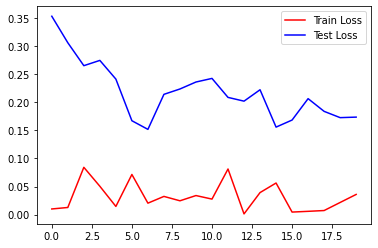

In [163]:
# plot the loss plot
plt.plot(history_1.history['loss'], 'r')
plt.plot(history_1.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

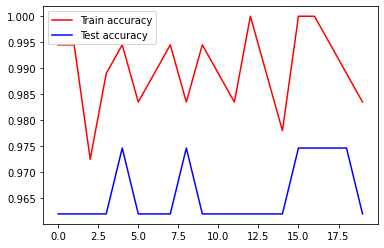

In [164]:
# plot the accuracy plot
plt.plot(history_1.history['accuracy'], 'r')
plt.plot(history_1.history['val_accuracy'], 'b')
plt.legend({'Train accuracy': 'r', 'Test accuracy':'b'})
plt.show()

In [160]:
new = ['ANN ',score_2[2]]
results.loc[1] = new

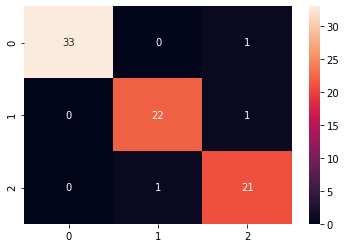

In [162]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(model_2.predict_classes(X_test),np.argmax(y_test,axis=1)))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [174]:
# classification_report
matrix = classification_report(model_2.predict_classes(X_test),np.argmax(y_test,axis=1))
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.96      0.96      0.96        23
           2       0.91      0.95      0.93        22

    accuracy                           0.96        79
   macro avg       0.96      0.96      0.96        79
weighted avg       0.96      0.96      0.96        79



C:\Users\BALARAMI REDDY\anaconda5\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Performance Table 

In [180]:
print(tabulate(results, headers='keys', tablefmt='psql'))

+----+---------+-----------------+
|    | model   |   Test-Accuracy |
|----+---------+-----------------|
|  0 | CNN     |        0.949367 |
|  1 | ANN     |        0.962025 |
+----+---------+-----------------+
